# Feature Scaling Notebook


Most of the time, we encounter different types of variables with different ranges in the same dataset which can differ a lot.  If we use the data with the original scale, we will certainly put more weight on the variables with a large range. Therefore, we need to apply what we call features rescaling to make sure the variables are almost on the same scale. It allows comparing features (apple to apples) as equally important.

In [1]:
# Load necessary Python libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
from scipy.stats import skew
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import preprocessing
import os

In [3]:
# Load a dataset
csv_data = '../data/datasets/brain_train.csv'
data = pd.read_csv(csv_data, delimiter=';')
df = data[["Target","TotalGrayVol"]]
y = df.loc[:, df.columns == 'Class'].values.ravel()
X = df.loc[:, df.columns != 'Class']
print(df.head())

   Target   TotalGrayVol
0       1  684516.128934
1       1  615126.611828
2       1  678687.178551
3       1  638615.189584
4       1  627356.125850


# StandardScaler

The result of the dataset standardization (or Z-score normalization) is that the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1,respectively. It is necessary when continuous independent variables are measured at different scales such as in different measurement units.

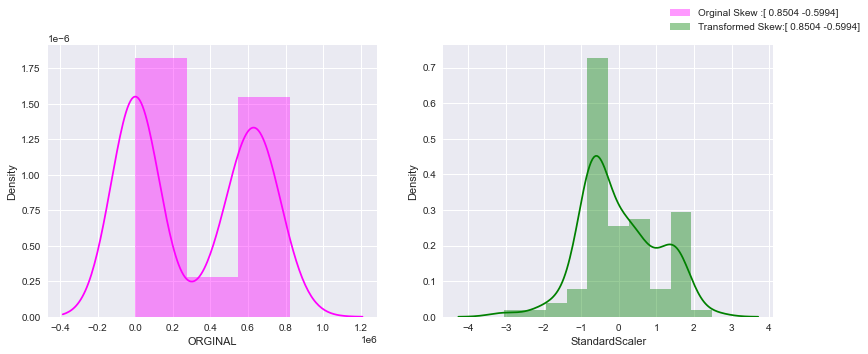

In [4]:
# define StandardScaler
StandardScaler = preprocessing.StandardScaler()

# transform data
stdscaler_transformed = StandardScaler.fit_transform(X)

# plot result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Orginal Skew :{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(stdscaler_transformed, label= "Transformed Skew:{0}".format(np.round(skew(stdscaler_transformed),4)), color="g", ax=ax[1], axlabel="StandardScaler")
fig.legend()
#plt.savefig(folder+'re.png', bbox_inches='tight')
plt.show()

# MinMaxScaler

We also can transform features by scaling each of them to a defined range (e.g., between -1 and 1 or 0 and 1). Min-max scaling (MinMaxScaler) can for instance be very useful for some machine learning models. MinMax scaling has some advantages over StandardScaler when data distribution is not Gaussian and the feature falls within a bounded interval which is typically the case on pixel intensity’s fitting within a 0-255 range.

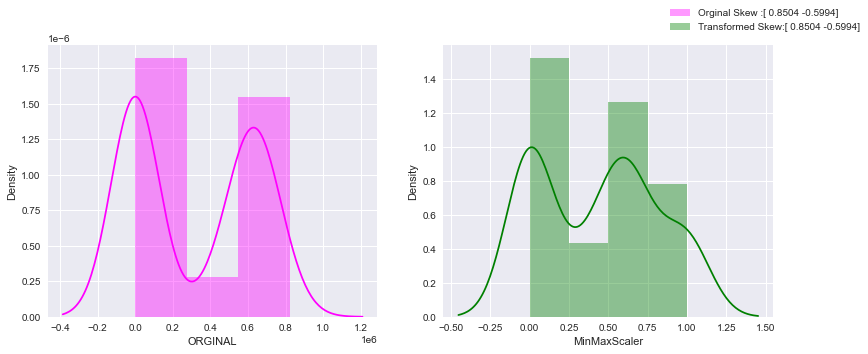

In [5]:
# define MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# transform data
minmax_transformed = min_max_scaler.fit_transform(X)

# plot the result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Orginal Skew :{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(minmax_transformed, label= "Transformed Skew:{0}".format(np.round(skew(minmax_transformed),4)), color="g", ax=ax[1], axlabel="MinMaxScaler")
fig.legend()
#plt.savefig(folder+'re.png', bbox_inches='tight')
plt.show()


# MaxAbsScaler

The MaxAbsScaler is like the MinMaxScaler with the difference that it automatically scales the data between 0 and 1 based on the absolute maximum. This scaler is specifically suitable for data that is already centered at zero or sparse data and does not center the data which keeps sparsity.

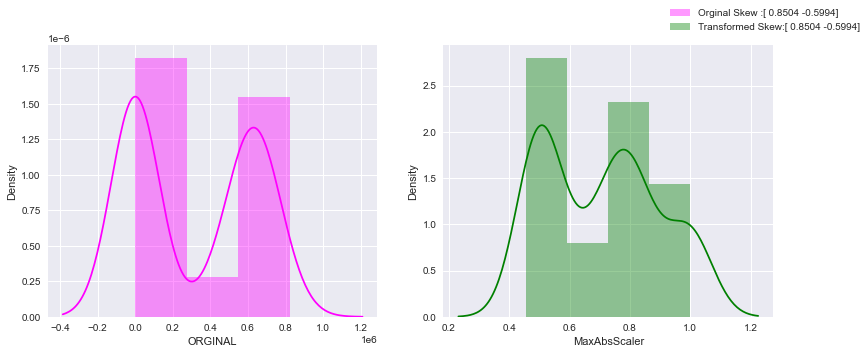

In [6]:
# define MaxAbsScaler
max_abs_scaler = preprocessing.MaxAbsScaler()

# transform data
maxabs_transformed = max_abs_scaler.fit_transform(X)

# plot result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Orginal Skew :{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(maxabs_transformed, label= "Transformed Skew:{0}".format(np.round(skew(maxabs_transformed),4)), color="g", ax=ax[1], axlabel="MaxAbsScaler")
fig.legend()
#plt.savefig(folder+'re.png', bbox_inches='tight')
plt.show()


# RobustScaler

If your data contains an important number of outliers, the use of the mean and variance to scale the data will probably not work correctly. In this case, an option is the use of RobustScaler which removes the median and scales the data according to the quantile range.

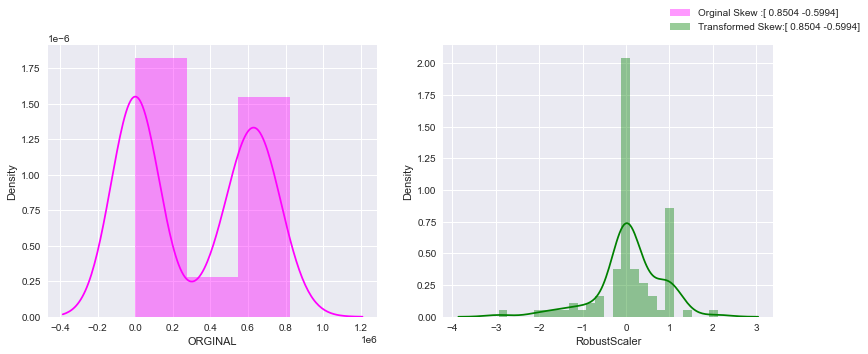

In [7]:
# define RobustScaler
RobustScaler = preprocessing.RobustScaler()

# transform data
robust_transformed = RobustScaler.fit_transform(X)

# plot result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Orginal Skew :{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(robust_transformed, label= "Transformed Skew:{0}".format(np.round(skew(robust_transformed),4)), color="g", ax=ax[1], axlabel="RobustScaler")
fig.legend()
#plt.savefig(folder+'re.png', bbox_inches='tight')
plt.show()

# Normalizer

Normalizer is also a technique of scaling individual samples to have unit norm which is a common operation for clustering or text classification. We need to normalize data when our model predicts based on the weighted relationship formed between data points. To give a mental image, standardization is a column-wise operation while normalization is a row-wise operation. As standardization, we have different ways to normalize: l1, l2, max. By default, in scikit-learn, Normalizer uses l2. We can change it using the norm option (‘l1’, ‘l2’, ‘max’).

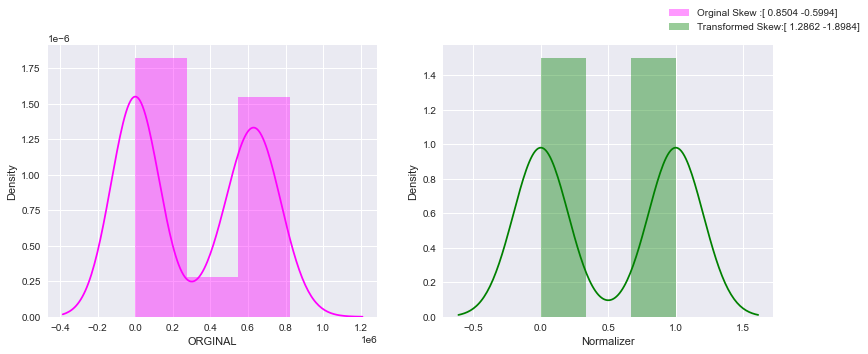

In [8]:
# define Normalizer
Normalize = preprocessing.Normalizer()

# transform data
norm_transformed = Normalize.fit_transform(X)

# plot result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Orginal Skew :{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(norm_transformed, label= "Transformed Skew:{0}".format(np.round(skew(norm_transformed),4)), color="g", ax=ax[1], axlabel="Normalizer")
fig.legend()
#plt.savefig(folder+'re.png', bbox_inches='tight')
plt.show()
    

# Log Transformation

The lognormal transformation converts the values to a lognormal scale. In log transformation, each variable of x will be replaced by log (x) with natural, base 10 or base 2 log. 

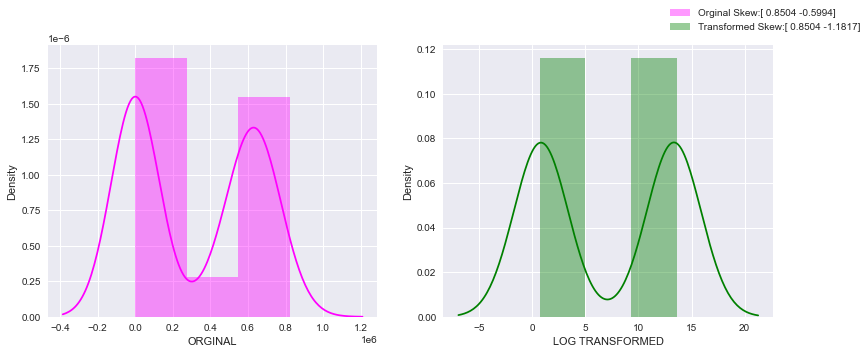

In [9]:
# define square root transformation and transform the data
log_target = np.log1p(X)

# plot the result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Orginal Skew:{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(log_target, label= "Transformed Skew:{0}".format(np.round(skew(log_target),4)), color="g", ax=ax[1], axlabel="LOG TRANSFORMED")
fig.legend()
#plt.savefig(folder+'Log.png', bbox_inches='tight')
plt.show()

# Square Root Transformation

In square root transformation, x will be replaced by the square root(x). It will give moderate effect but can be applied to zero values.

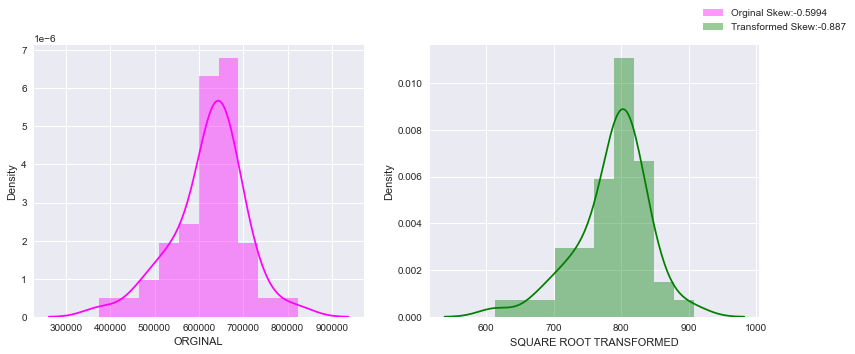

In [10]:
# define square root transformation and transform the data
sqrrt_target = df['TotalGrayVol']**(1/2)

# plot the result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df['TotalGrayVol'], label= "Orginal Skew:{0}".format(np.round(skew(df['TotalGrayVol']),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(sqrrt_target, label= "Transformed Skew:{0}".format(np.round(skew(sqrrt_target),4)), color="g", ax=ax[1], axlabel="SQUARE ROOT TRANSFORMED")
fig.legend()
#plt.savefig(folder+'SQRT.png', bbox_inches='tight')
plt.show()

# Reciprocal Transformation

In reciprocal transformation, x will be replaced by its inverse (1/x).

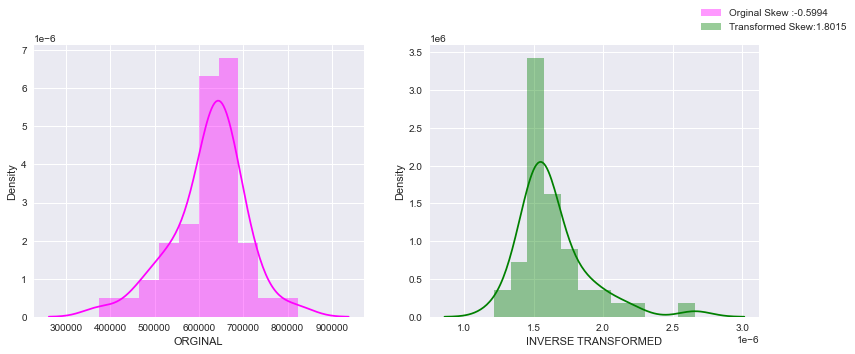

In [11]:
# define and transform the data
re_target = 1/df['TotalGrayVol']

# plot the result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df['TotalGrayVol'], label= "Orginal Skew :{0}".format(np.round(skew(df['TotalGrayVol']),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(re_target, label= "Transformed Skew:{0}".format(np.round(skew(re_target),4)), color="g", ax=ax[1], axlabel="INVERSE TRANSFORMED")
fig.legend()
#plt.savefig(folder+'re.png', bbox_inches='tight')
plt.show()

# Box-Cox

Box-Cox transformation.

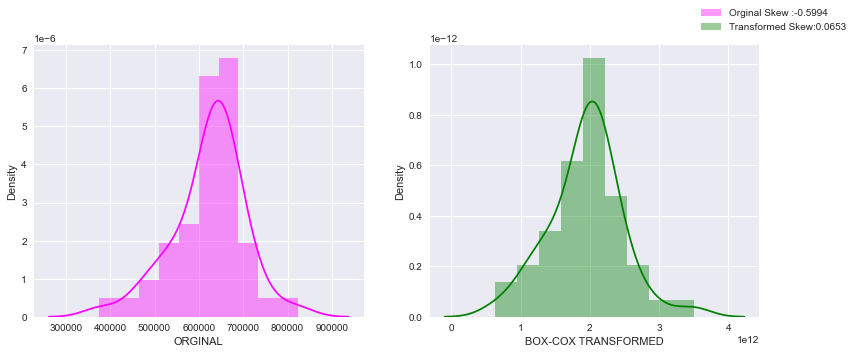

In [12]:
from scipy.stats import boxcox

# define and transform the data
bcx_target, lam = boxcox(df['TotalGrayVol'])

# plot the result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df['TotalGrayVol'], label= "Orginal Skew :{0}".format(np.round(skew(df['TotalGrayVol']),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(bcx_target, label= "Transformed Skew:{0}".format(np.round(skew(bcx_target),4)), color="g", ax=ax[1], axlabel="BOX-COX TRANSFORMED")
fig.legend()
#plt.savefig(folder+'bcx.png', bbox_inches='tight')
plt.show()

# Yeo-Johnson

Yeo-Johnson transformation.

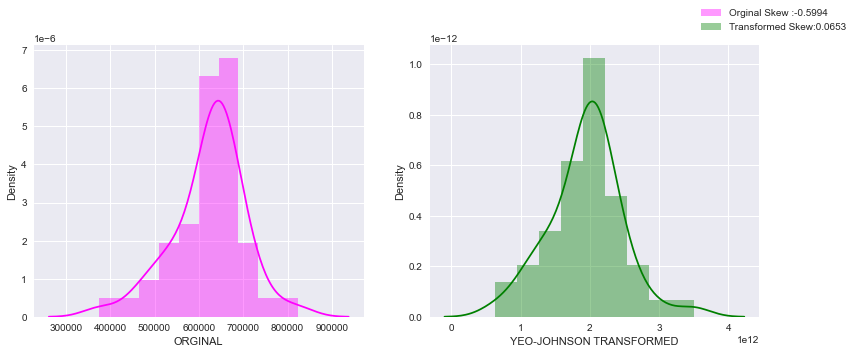

In [13]:
from scipy.stats import yeojohnson

# define and transform the data
yj_target, lam = yeojohnson(df['TotalGrayVol'])

# plot the result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(df['TotalGrayVol'], label= "Orginal Skew :{0}".format(np.round(skew(df['TotalGrayVol']),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(bcx_target, label= "Transformed Skew:{0}".format(np.round(skew(bcx_target),4)), color="g", ax=ax[1], axlabel="YEO-JOHNSON TRANSFORMED")
fig.legend()
#plt.savefig(folder+'bcx.png', bbox_inches='tight')
plt.show()

# Quantile Transformation: normal distribution output

The nonparametric quantile transformation transforms the data to a certain data distribution such as normal distribution by applying quantile function, an inverse function of the cumulative distribution function (CDF), into the data.

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (900) is greater than the total number of samples (46). n_quantiles is set to n_samples.
  warnings.warn(


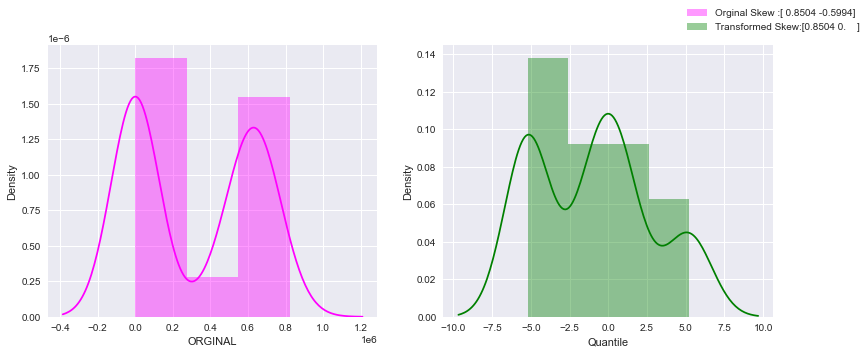

In [14]:
from sklearn.preprocessing import QuantileTransformer

# define QuantileTransformer
Transformer=QuantileTransformer(n_quantiles=900, output_distribution="normal")

# transform the data
quantile_transform = Transformer.fit_transform(X)

# plot the result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Orginal Skew :{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(quantile_transform, label= "Transformed Skew:{0}".format(np.round(skew(quantile_transform),4)), color="g", ax=ax[1], axlabel="Quantile")
fig.legend()
#plt.savefig(folder+'re.png', bbox_inches='tight')
plt.show()

# Quantile Transformation: Uniform distribution output

The nonparametric quantile transformation transforms the data to a certain data distribution such as uniform distribution by applying quantile function, an inverse function of the cumulative distribution function (CDF), into the data.

/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (900) is greater than the total number of samples (46). n_quantiles is set to n_samples.
  warnings.warn(


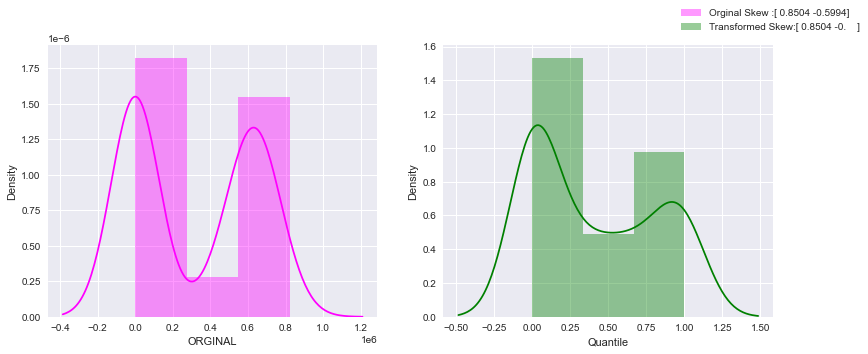

In [15]:
from sklearn.preprocessing import QuantileTransformer

# define QuantileTransformer
Transformer=QuantileTransformer(n_quantiles=900, output_distribution="uniform")

# transform the data
quantile_transform = Transformer.fit_transform(X)

# plot the result
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Orginal Skew :{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="ORGINAL")
sns.distplot(quantile_transform, label= "Transformed Skew:{0}".format(np.round(skew(quantile_transform),4)), color="g", ax=ax[1], axlabel="Quantile")
fig.legend()
#plt.savefig(folder+'re.png', bbox_inches='tight')
plt.show()